In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
training_data = pd.read_csv('./datasets/Train_data.csv', index_col=0)
testing_data = pd.read_csv('./datasets/Test_data.csv', index_col=0)
training_data.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,zone_PU,LocationID_PU,zone_DO,LocationID_DO,Bronx_PU,Brooklyn_PU,Manhattan_PU,Queens_PU,Staten_Island_PU,Bronx_DO,Brooklyn_DO,Manhattan_DO,Queens_DO,Staten_Island_DO,VendorID_isna,passenger_count_isna,RatecodeID_isna,payment_type_isna,Manhattan_PU_isna,Queens_PU_isna,Bronx_PU_isna,Brooklyn_PU_isna,Staten_Island_PU_isna,Manhattan_DO_isna,Queens_DO_isna,Bronx_DO_isna,Brooklyn_DO_isna,Staten_Island_DO_isna,Mins_In_Ride,above_200_miles,fare_amount_above_200,extra_above_100,tip_amount_above_50,tolls_amount_100,improvement_surcharge_below_0,Mins_In_Ride_above_500,N,NK,Y,dayofweek,PU_Year,PU_Month,PU_Day,PU_Hour,PU_Minute,PU_Second,DO_Year,DO_Month,DO_Day,DO_Hour,DO_Minute,DO_Second,total_amount
8515315,2.0,1.0,1.52,1.0,144,231,1.0,8.5,0.5,0.5,2.46,0.0,0.3,2.5,22,144,41,231,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.53,0,0,0.5,0,0,0,0,1,0,0,3,2020,1,23,22,51,8,2020,1,23,23,0,40,14.76
5670048,2.0,1.0,3.46,1.0,263,42,1.0,16.0,0.0,0.5,3.36,0.0,0.3,0.0,39,263,69,42,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.68,0,0,0.0,0,0,0,0,1,0,0,1,2020,3,3,10,56,2,2020,3,3,11,16,43,20.16
13690925,2.0,3.0,2.09,1.0,148,87,1.0,10.5,0.5,0.5,2.14,0.0,0.3,2.5,21,148,31,87,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.67,0,0,0.5,0,0,0,0,1,0,0,6,2020,2,23,2,18,32,2020,2,23,2,32,12,16.44
14720300,2.0,1.0,0.93,1.0,179,179,2.0,5.5,0.0,0.5,0.00,0.0,0.3,0.0,77,179,77,179,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.53,0,0,0.0,0,0,0,0,1,0,0,2,2020,1,1,8,40,58,2020,1,1,8,46,30,6.30
7739148,2.0,1.0,1.76,1.0,170,140,1.0,7.5,0.5,0.5,2.26,0.0,0.3,2.5,12,170,37,140,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.07,0,0,0.5,0,0,0,0,1,0,0,1,2020,2,25,23,49,34,2020,2,25,23,56,38,13.56


In [21]:
# temp_training = np.sqrt(training_data)
# temp_testing = np.sqrt(testing_data)
temp_training = training_data
temp_testing = testing_data

In [45]:
temp_training['between_0_100'] = ((temp_training['trip_distance'] > 0) < 100).replace({False: 0, True: 1})
temp_training['less_than_50'] = (temp_training['trip_distance'] < 50).replace({False: 0, True: 1})
temp_training['tip_less_than_10'] = (temp_training['tip_amount'] < 10).replace({False: 0, True: 1})
temp_training['tips_at_5'] = (temp_training['tip_amount'] == 5).replace({False: 0, True: 1})

In [46]:
temp_testing['between_0_100'] = ((temp_testing['trip_distance'] > 0) < 100).replace({False: 0, True: 1})
temp_testing['less_than_50'] = (temp_testing['trip_distance'] < 50).replace({False: 0, True: 1})
temp_testing['tip_less_than_10'] = (temp_testing['tip_amount'] < 10).replace({False: 0, True: 1})
temp_testing['tips_at_5'] = (temp_testing['tip_amount'] == 5).replace({False: 0, True: 1})

In [ ]:
# temp_training = temp_training.fillna(0)
# temp_testing = temp_training.fillna(0)

In [ ]:
# temp_training = temp_training.replace([-np.inf, np.inf], 0)
# temp_testing = temp_testing.replace([-np.inf, np.inf], 0)

In [47]:
temp_X_train = temp_training.drop(['total_amount'], axis=1)
temp_X_test = temp_testing.drop(['total_amount'], axis=1)
temp_y_train = temp_training['total_amount']
temp_y_test = temp_testing['total_amount']

In [11]:
X_train = training_data.drop(['total_amount'], axis=1)
X_test = testing_data.drop(['total_amount'], axis=1)
y_train = training_data['total_amount']
y_test = testing_data['total_amount']

In [48]:
temp_linreg = LinearRegression()
temp_linreg.fit(temp_X_train, temp_y_train)
temp_y_pred = temp_linreg.predict(temp_X_test)

In [13]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

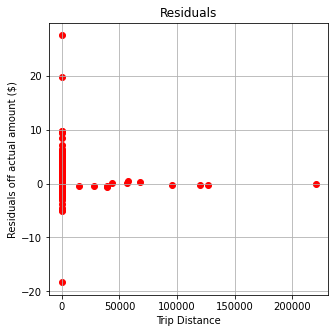

In [35]:
residuals = y_test - y_pred
plt.figure(figsize=(5,5))
plt.grid(True)
plt.scatter(x=X_test['tip_amount'], y=residuals, c='red')
plt.xlabel('Trip Distance')
plt.ylabel('Residuals off actual amount ($)')
plt.title('Residuals')
plt.show()

In [18]:
mean_squared_error(y_test, y_pred, squared=False)

0.28761679790561656

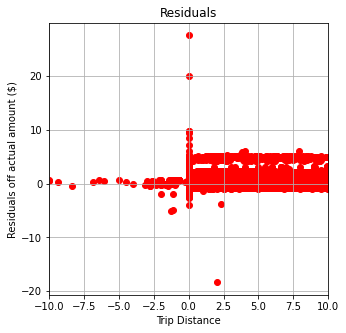

In [49]:
temp_residuals = temp_y_test - temp_y_pred
plt.figure(figsize=(5,5))
plt.scatter(x=temp_X_test['tip_amount'], y=temp_residuals, c='red')
plt.grid(True)
plt.xlim(-10, 10)
plt.xlabel('Trip Distance')
plt.ylabel('Residuals off actual amount ($)')
plt.title('Residuals')
plt.show()

In [50]:
mean_squared_error(temp_y_test, temp_y_pred, squared=False)

0.28755304207950694